In [294]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [295]:
df = pd.read_csv('laptop_data.csv')

In [296]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [297]:
df.shape

(1303, 12)

In [298]:
len(df.Company.unique())

19

In [299]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [300]:
df.duplicated().sum()

0

In [301]:
df1=df.drop_duplicates()

In [302]:
df1.shape

(1303, 12)

Data Cleaning

In [303]:
df2 = df1.drop(['Unnamed: 0'], axis=1)

In [304]:
df2.Ram = df2.Ram.str.replace('GB','').astype(int)

In [305]:
df2.Weight = df2.Weight.str.replace('kg','').astype(float)

In [306]:
df2.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


EDA

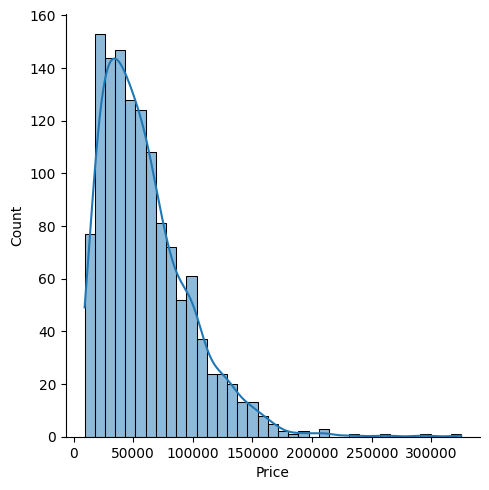

In [307]:
sns.displot(df2['Price'], kde=True)

<Axes: xlabel='Company'>

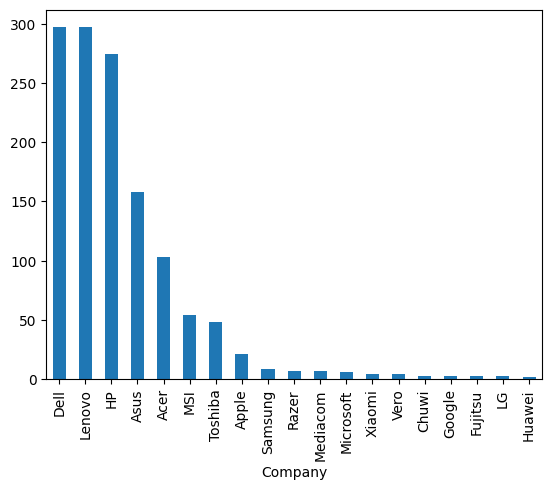

In [308]:
df2['Company'].value_counts().plot(kind='bar')

<Axes: xlabel='TypeName'>

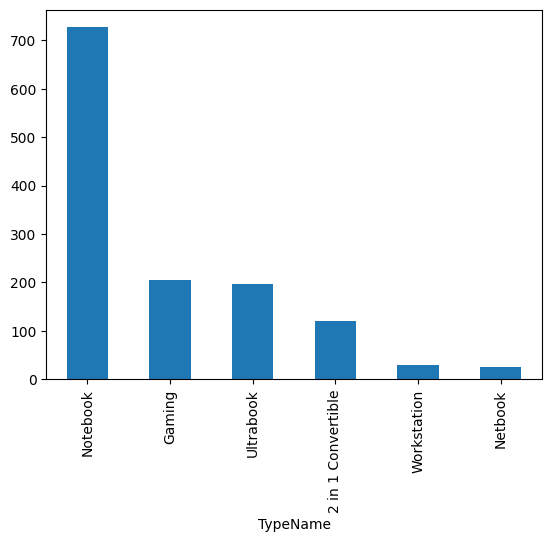

In [309]:
df2['TypeName'].value_counts().plot(kind='bar')

<Axes: xlabel='TypeName'>

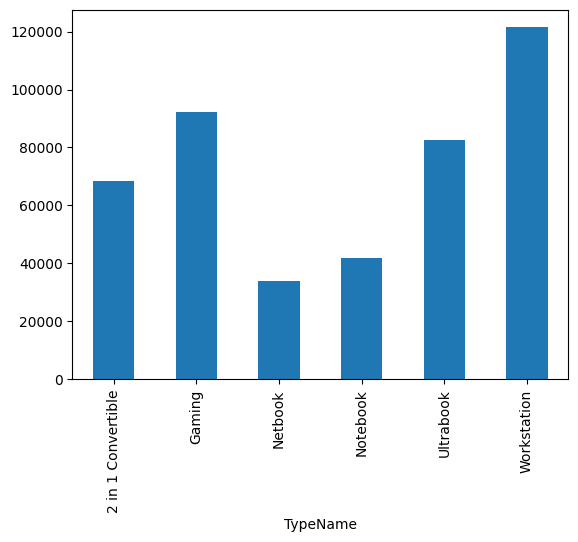

In [310]:
df2['Price'].groupby(df2['TypeName']).mean().plot(kind='bar')

C:\Users\karma\AppData\Local\Temp\ipykernel_13704\3088523568.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df2['Inches'], kde=True)


<Axes: xlabel='Inches', ylabel='Density'>

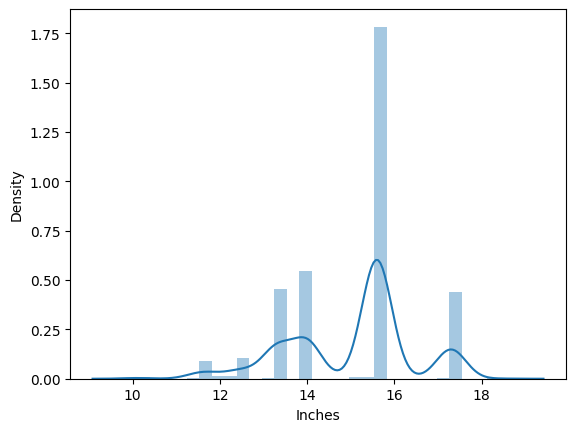

In [311]:
sns.distplot(df2['Inches'], kde=True)

<Axes: xlabel='Inches', ylabel='Price'>

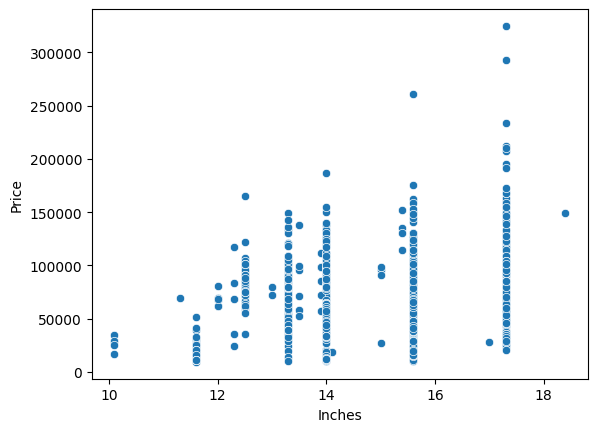

In [312]:
sns.scatterplot(x='Inches', y='Price', data=df2)

In [313]:
df2['Touch Screen'] = df2.ScreenResolution.apply(lambda x: 1 if 'Touch' in x else 0)

In [314]:
df2['Ips'] = df2.ScreenResolution.apply(lambda x: 1 if 'IPS' in x else 0)

In [315]:
df2.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch Screen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


In [316]:
df3 = df2.copy()
df3.ScreenResolution=df3.ScreenResolution.str.strip()
res = df3.ScreenResolution.str.split(' ').str.get(-1).str.split('x')
df3['X_res'] = res.str.get(0).astype(int)
df3['Y_res'] = res.str.get(1).astype(int)

In [317]:
df3['PPI'] = (((df3.X_res**2) + (df3.Y_res**2))**0.5/df3.Inches).astype(float)

In [318]:
df4 = df3.drop(['ScreenResolution', 'X_res', 'Y_res', 'Inches'], axis=1)
df4.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch Screen,Ips,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [319]:
df4['Cpu'] = df4['Cpu'].apply(lambda x: " ".join(x.split()[:3]))
df4.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touch Screen,Ips,PPI
0,Apple,Ultrabook,Intel Core i5,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [320]:
def cpu_brand(text):
    if text == 'Intel Core i5' or text == 'Intel Core i7' or text == 'Intel Core i3':
        return text
    if 'Intel' in text:
        return 'other Intel processor'
    else:
        return 'AMD processor'

In [321]:
df4['Cpu brand'] = df4['Cpu'].apply(cpu_brand)

In [322]:
df4['Memory'].unique()

array(['128GB SSD', '128GB Flash Storage', '256GB SSD', '512GB SSD',
       '500GB HDD', '256GB Flash Storage', '1TB HDD',
       '32GB Flash Storage', '128GB SSD +  1TB HDD',
       '256GB SSD +  256GB SSD', '64GB Flash Storage',
       '256GB SSD +  1TB HDD', '256GB SSD +  2TB HDD', '32GB SSD',
       '2TB HDD', '64GB SSD', '1.0TB Hybrid', '512GB SSD +  1TB HDD',
       '1TB SSD', '256GB SSD +  500GB HDD', '128GB SSD +  2TB HDD',
       '512GB SSD +  512GB SSD', '16GB SSD', '16GB Flash Storage',
       '512GB SSD +  256GB SSD', '512GB SSD +  2TB HDD',
       '64GB Flash Storage +  1TB HDD', '180GB SSD', '1TB HDD +  1TB HDD',
       '32GB HDD', '1TB SSD +  1TB HDD', '512GB Flash Storage',
       '128GB HDD', '240GB SSD', '8GB SSD', '508GB Hybrid', '1.0TB HDD',
       '512GB SSD +  1.0TB Hybrid', '256GB SSD +  1.0TB Hybrid'],
      dtype=object)

In [323]:
def memo_size(text):
    if '2TB' in text: return 2048
    if '1TB' in text: return 1024
    if '1.0TB' in text: return 1024
    if '512GB' in text: return 512
    if '256GB' in text: return 256
    if '128GB' in text: return 128
    if '64GB' in text: return 64
    if '32GB' in text: return 32
    if '16GB' in text: return 16
    if '8GB' in text: return 8
    if '4GB' in text: return 4
    else: return 0

In [324]:
def hdd_ssd_flash_capacity(text):
    if 'SSD' in text:
        return memo_size(text)
    if 'HDD' in text:
        return memo_size(text)
    if 'Flash' in text:
        return memo_size(text)
    if 'Hybrid' in text:
        return memo_size(text)
    else:
        return 0

In [325]:
df4['SSD'] = df4['Memory'].apply(lambda x: hdd_ssd_flash_capacity(x.split('+')[0]) if 'SSD' in x else 0)
df4['HDD'] = df4['Memory'].apply(lambda x: hdd_ssd_flash_capacity(x.split('+')[-1]) if 'HDD' in x else 0)
df4['Hybrid'] = df4['Memory'].apply(lambda x: hdd_ssd_flash_capacity if 'Hybrid' in x else 0)
df4['Flash'] = df4['Memory'].apply(lambda x: hdd_ssd_flash_capacity(x) if 'Flash' in x else 0)

In [326]:
df5 = df4.drop(['Flash', 'Hybrid', 'Memory'], axis=1)
df5.head()

,Company,TypeName,Cpu,Ram,Gpu,OpSys,Weight,Price,Touch Screen,Ips,PPI,Cpu brand,SSD,HDD
0,Apple,Ultrabook,Intel Core i5,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0
1,Apple,Ultrabook,Intel Core i5,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,Intel Core i5,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,256,0
3,Apple,Ultrabook,Intel Core i7,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,512,0
4,Apple,Ultrabook,Intel Core i5,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,256,0


In [327]:
df5['Gpu brand'] = df5['Gpu'].apply(lambda x: x.split(' ')[0] )

In [328]:
df5['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [329]:
df5 = df5[df5['Gpu brand'] != 'ARM']

In [330]:
df5.shape

(1302, 15)

In [331]:
df6 = df5.drop(columns=['Gpu'])

In [332]:
def cat_os(text):
    if 'Windows' in text:
        return 'Windows'
    if 'Mac' or 'mac' in text:
        return 'Mac'
    if 'Linux' in text:
        return 'Linux'
    else:
        return 'Other'

In [333]:
df6['OS'] = df6['OpSys'].apply(cat_os)

In [334]:
df7 = df6.drop(columns=['OpSys'])

In [335]:
df8 = df7.drop(columns=['Company', 'Cpu', 'TypeName', 'Cpu brand', 'Gpu brand', 'OS'])

<Axes: >

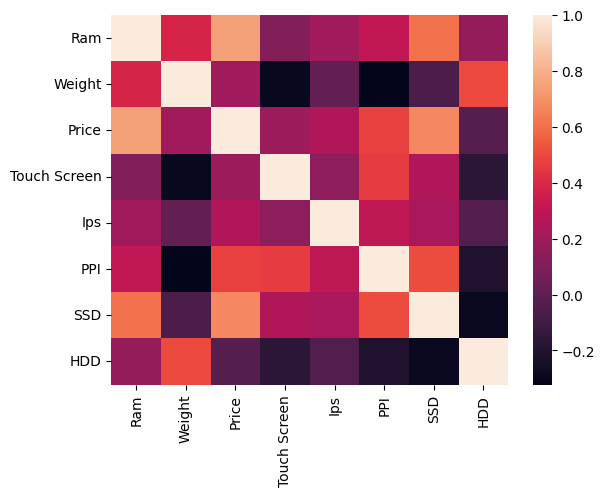

In [336]:
sns.heatmap(df8.corr())

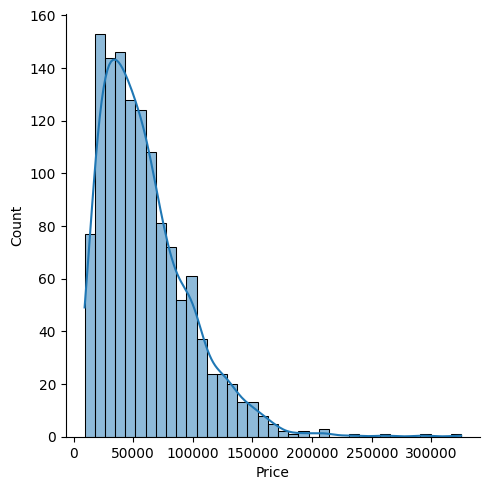

In [337]:
sns.displot(df8['Price'], kde=True)

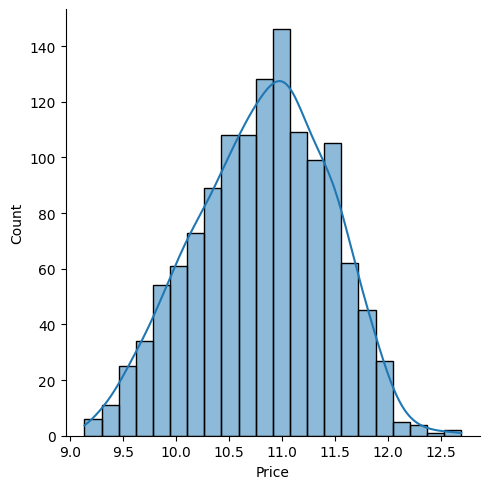

In [338]:
sns.displot(np.log(df8['Price']), kde=True)

In [348]:
df7
# df7.drop(columns=['Cpu'], inplace=True)
x = df7.drop(columns=['Price'])
y = np.log(df7['Price'])
# x

TRAIN TEST SPLITTING

In [349]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.15, random_state=2)

string to numerical encoding for categorical variables

In [350]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [351]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostRegressor, ExtraTreesRegressor

In [352]:
df7.head(1)

,Company,TypeName,Ram,Weight,Price,Touch Screen,Ips,PPI,Cpu brand,SSD,HDD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,128,0,Intel,Mac


In [344]:
step1 = ColumnTransformer = ColumnTransformer(
    [('categorical', OneHotEncoder(drop='first'),
       ['Company',' TypeName', 'Cpu brand', 'Gpu brand', 'OS']),
       ('numerical', StandardScaler(), 
        ['Ram', 'Weight', 'X_res', 'Y_res', 'PPI', 'SSD', 'HDD', 'Touch Screen', 'Ips']
        )], remainder='passthrough')
step2 = LinearRegression()
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])
pipe.fit(x_train, y_train)
y_pred = pipe.predict(x_test)
print('accuracy: ', pipe.score(x_test, y_test))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('R2 Score:', r2_score(y_test, y_pred))

ValueError: A given column is not a column of the dataframe